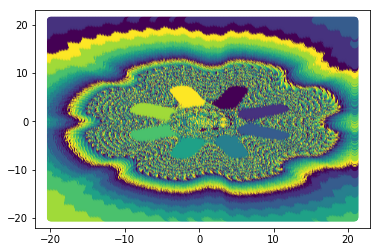

In [1]:
#!/usr/bin/env python3

import itertools

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm


GRID_RESOLUTION = 0.1


class DynamicalSystem():
    """A specific discrete dynamical system of two variables"""
    def __init__(self, point, a=0.7, b=0.9998):
        self.x = point[0]
        self.y = point[1]
        self.a = a
        self.b = b
        self.f = a*self.x + 2*(1-self.a)*self.x**2/(1+self.x**2)

    def tick(self):
        """Performs one evolution step"""
        old_x = self.x
        self.x = self.y + self.f
        self.f = self.a*self.x + 2*(1-self.a)*self.x**2/(1+self.x**2)
        self.y = -self.b*old_x + self.f

    def evolved_point(self, steps):
        """Performs <steps> ticks and return the resulting x,y point"""
        for _ in range(steps):
            self.tick()
        return np.array([self.x, self.y])


def closest_basin(point):
    """Returns index of the basin of attraction closest to a specific <point>
    """
    # pre-calculated points for the basins of attraction for the system.
    BASINS = np.array([
        [4.69897327,  4.92529175],
        [8.7885769,   2.04630155],
        [8.79063658, -2.04103883],
        [4.70474152, -4.92149458],
        [-1.0541107, -5.12588343],
        [-5.5479663, -2.24855637],
        [-5.55101262, 2.2422881],
        [-1.06228051, 5.12440945],
    ])
    distances = [norm(point - basin) for basin in BASINS]
    return np.argmin(distances)


def fate(point):
    """Evolves a point for a long while until reaching a basin."""
    STEPS = 6000
    system = DynamicalSystem(point)
    eventual_location = system.evolved_point(STEPS)
    return closest_basin(eventual_location)


def grid_fate():
    """Calculates basins of attraction for an entire grid"""
    xs = np.arange(-20, 20+1, GRID_RESOLUTION)
    ys = np.arange(-20, 20+1, GRID_RESOLUTION)
    return np.array([(x, y, fate([x, y])) for x in xs for y in ys])


def plot_grid(grid):
    """Plot the color of the evolved basin for each point on a <grid>"""
    plt.scatter(grid[:, 0], grid[:, 1], c=grid[:, 2])
    plt.show()


if __name__ == '__main__':
    plot_grid(grid_fate())
